In [15]:
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = InteractiveSession(config=config)

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist

In [33]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [52]:
x_train = np.expand_dims(x_train ,-1)
x_test = np.expand_dims(x_test ,-1)

In [53]:
x_train.shape

(60000, 28, 28, 1)

In [54]:
x_test.shape

(10000, 28, 28, 1)

In [55]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [22]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation= 'relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation= 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [25]:
model.fit(x_train,y_train, batch_size=128, epochs = 4)

Epoch 1/4
469/469 [==============================] - 2s 4ms/step - loss: 0.6544 - accuracy: 0.9304
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0575 - accuracy: 0.9816
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0401 - accuracy: 0.9875
Epoch 4/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0306 - accuracy: 0.9904


In [27]:
from sklearn.metrics import confusion_matrix
p_test=model.predict(x_test).argmax(axis=1)

In [31]:
y_test.argmax(axis=1)

AttributeError: 'builtin_function_or_method' object has no attribute 'argmax'

In [35]:

confusion_matrix(y_test,p_test)

array([[ 969,    2,    1,    0,    2,    0,    5,    1,    0,    0],
       [   0, 1133,    0,    1,    0,    0,    0,    1,    0,    0],
       [   2,    8, 1007,    0,    2,    0,    3,    9,    1,    0],
       [   0,    1,    1, 1004,    0,    2,    0,    1,    1,    0],
       [   1,    2,    0,    0,  967,    0,    3,    4,    0,    5],
       [   3,    0,    0,   12,    0,  869,    3,    3,    2,    0],
       [   2,    5,    0,    0,    1,    1,  946,    0,    3,    0],
       [   0,    1,    2,    1,    0,    0,    0, 1024,    0,    0],
       [   6,    2,    0,    1,    0,    1,    0,    4,  956,    4],
       [   1,    3,    0,    6,    5,    2,    0,   15,    2,  975]],
      dtype=int64)

Text(0.5, 1.0, 'true:7, pre:1')

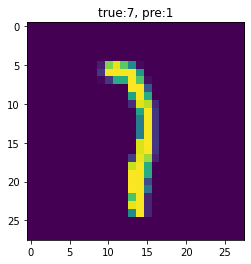

In [49]:
import matplotlib.pyplot as plt
missclass = np.where(y_test != p_test)
i = np.random.choice(missclass[0])
plt.imshow(x_test[i])
plt.title("true:%s, pre:%s" %(y_test[i], p_test[i]))

In [38]:
np.random.choice()

ValueError: a must be 1-dimensional

In [50]:
missclass

(array([  62,   92,  115,  321,  326,  412,  447,  495,  646,  659,  717,
         723,  924,  947,  965, 1014, 1033, 1039, 1112, 1167, 1178, 1181,
        1224, 1226, 1232, 1247, 1260, 1299, 1319, 1337, 1393, 1396, 1459,
        1467, 1530, 1553, 1621, 1709, 1790, 1828, 1901, 1938, 1982, 2018,
        2035, 2040, 2093, 2129, 2130, 2135, 2149, 2272, 2329, 2361, 2369,
        2387, 2406, 2414, 2447, 2462, 2582, 2597, 2654, 2742, 2896, 2927,
        2939, 2953, 2970, 2979, 2995, 3005, 3060, 3250, 3289, 3384, 3503,
        3520, 3558, 3559, 3727, 3778, 3780, 3806, 3811, 3818, 3821, 3906,
        3926, 3985, 4163, 4176, 4205, 4224, 4248, 4265, 4294, 4359, 4443,
        4477, 4497, 4504, 4571, 4639, 4699, 4740, 4761, 4807, 4823, 4860,
        4939, 4995, 5634, 5676, 5752, 5937, 5955, 5981, 5982, 5985, 5997,
        6168, 6400, 6555, 6571, 6597, 6625, 6651, 7216, 7574, 8059, 8069,
        8079, 8094, 8160, 8408, 9009, 9587, 9620, 9634, 9642, 9669, 9679,
        9692, 9729, 9749, 9770, 9792, 

In [57]:
model.predict(x_test)[115]

array([4.18083975e-03, 6.58073509e-03, 3.42214844e-06, 2.38075572e-07,
       2.86380619e-01, 6.90401237e-07, 5.90102572e-05, 1.14713905e-04,
       2.57003848e-02, 6.76979363e-01], dtype=float32)

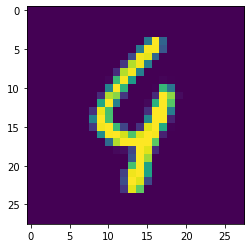

In [58]:
plt.imshow(x_test[115])

In [ ]:
tf.keras.datasets.fashion_mnist